# Ergebnis visualisieren

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)


In [2]:
path = "data/"

source_train = os.path.join(path + os.sep, "train.csv")
train = pd.read_csv(source_train)
source_test = os.path.join(path + os.sep, "test.csv")
test = pd.read_csv(source_test)
# Hard copy of the data
result = pd.read_csv("result.csv") 
df = result.copy()

In [3]:
df.describe()

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,208.500000,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.346890
std,120.810458,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.476551
min,0.000000,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,104.250000,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,208.500000,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,312.750000,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,417.000000,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [4]:
df[df["Survived"]==1].head(20)

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
8,8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
12,12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1
14,14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1
15,15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C,1
17,17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C,1
19,19,911,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C,1
21,21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S,1
22,22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,1
24,24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1


# Neue Spalten; Sex umwandeln in 0, 1, etc

In [5]:
# Leider nicht das Optimum, aber hoffentlich besser als vorher!
df["Tot_Fam_Members"] = df["SibSp"] + df["Parch"] + 1    # calculating the total number of relatives in one family
df["Price_Person"] = df["Fare"] / df["Tot_Fam_Members"]
df = df.drop("PassengerId", axis=1) 
# Info aus SibSp und Parch sind verarbeitet
#df = df.drop("SibSp", axis=1) 
#df = df.drop("Parch", axis=1) 

df["Sex"].replace({"male": 1, "female": 0}, inplace=True)
df["Embarked"].replace({"S": 0, "C": 1, "Q": 2}, inplace=True)

In [6]:
df_num = df.drop("Cabin", axis=1)
df_num = df_num.drop("Ticket", axis=1)
df_num = df_num.drop("Name", axis=1)
df_num = df_num.dropna(subset=["Embarked"])

In [7]:
df_num.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Tot_Fam_Members,Price_Person
0,0,3,1,34.5,0,0,7.8292,2,0,1,7.829200
1,1,3,0,47.0,1,0,7.0000,0,1,2,3.500000
2,2,2,1,62.0,0,0,9.6875,2,0,1,9.687500
3,3,3,1,27.0,0,0,8.6625,0,0,1,8.662500
4,4,3,0,22.0,1,1,12.2875,0,0,3,4.095833


# Histogramm survived ja/nein

In [8]:
#sns.pairplot(df, hue = "Survived") 


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

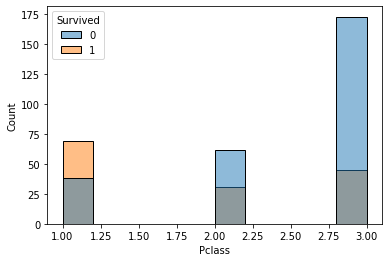

In [9]:
sns.histplot(data=df, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

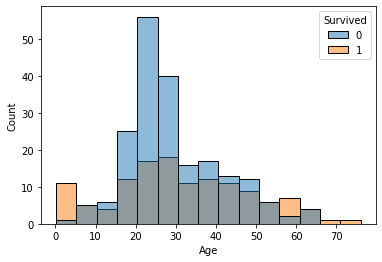

In [10]:
sns.histplot(data=df, x="Age", hue="Survived")

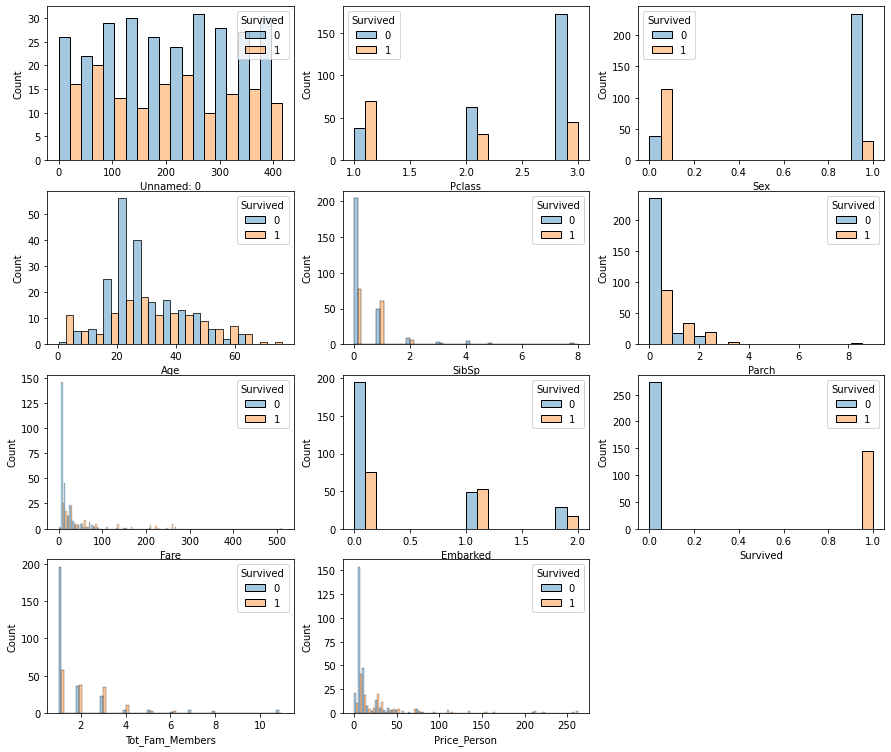

In [11]:
plt.figure(figsize=(15,13))
for i, column in enumerate(df_num.columns):
    plt.subplot(len(df_num.columns)//3+1, 3, i + 1)
    sns.histplot(x=column, hue="Survived", alpha=0.4, data=df_num, multiple="dodge")
# sns.despine()

<AxesSubplot:xlabel='Sex', ylabel='Count'>

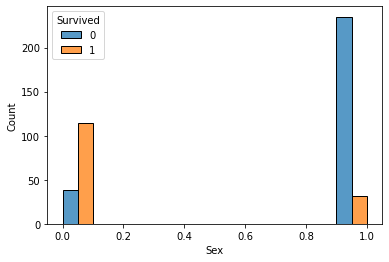

In [12]:
sns.histplot(data=df, x="Sex", hue="Survived", multiple="dodge")

<AxesSubplot:>

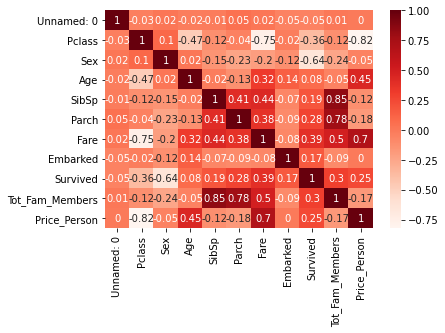

In [13]:
sns.heatmap(df.corr(method="spearman").round(2), annot = True, cmap= "Reds")

# Geschlecht versus Klasse

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

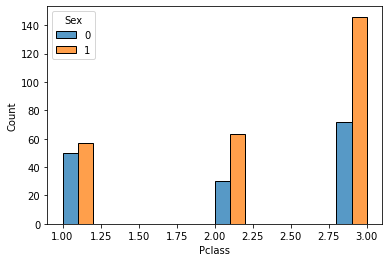

In [14]:
sns.histplot(x="Pclass", hue="Sex", data=df_num, multiple="dodge")

# Scatter-Plot Beziehung Pclass, Age, Sex und Survived

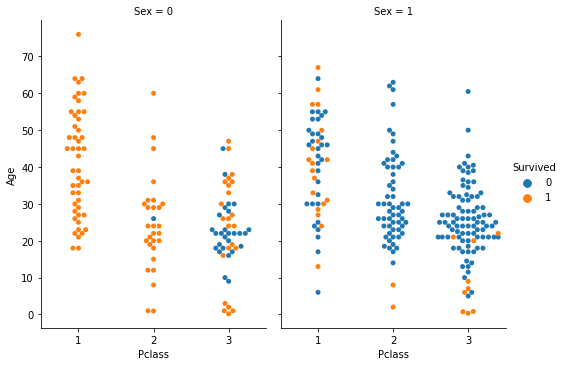

In [15]:
sns.catplot(x="Pclass", y="Age", col="Sex", hue="Survived", aspect=.7, kind="swarm", data=df_num)

In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Read result csv as df
result = pd.read_csv("Vergleich_Klassifikationen.csv")
result

,Unnamed: 0,Model,Train-Score,Test-Score,Laufzeit
0,0,bayes_default,0.767932,0.797753,0.002s
1,1,logreg_default,0.798875,0.803371,0.016s
2,2,knn_default,0.856540,0.808989,0.035s
3,3,knn_10_n,0.831224,0.797753,0.036s
4,4,svc_default,0.815752,0.797753,0.021s
5,5,svc_c10,0.834037,0.808989,0.070s
6,6,svc_grid,0.834037,0.808989,-1
7,7,tree_default,0.985935,0.769663,0.003s
8,8,tree_adapted,0.890295,0.837079,0.003s
9,9,tree_grid,0.881857,0.780899,-1


In [5]:
#make pngs to jppgs
from PIL import Image

pngs = [
	"/home/esralenz/Dokumente/02:Weiterbildung/ML/Projekt/Abgabe/Abgabe/Alfa_Training_Weiterbildung/outcome_ML.png",
	"/home/esralenz/Dokumente/02:Weiterbildung/ML/Projekt/Abgabe/Abgabe/Alfa_Training_Weiterbildung/pubcrawler_screen1.png",
	"/home/esralenz/Dokumente/02:Weiterbildung/ML/Projekt/Abgabe/Abgabe/Alfa_Training_Weiterbildung/Statistik_Beispiel.png"
]
def png_to_jpg():
	for png in pngs:
		im = Image.open(png)
		rgb_im = im.convert('RGB')
		rgb_im.save(png.replace(".png", ".jpg"))

In [6]:
png_to_jpg()